In [51]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

In [3]:
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
print(train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [6]:
display_all(train.tail().T)

,886,887,888,889,890
PassengerId,887,888,889,890,891
Survived,0,1,0,1,0
Pclass,2,1,3,1,3
Name,"Montvila, Rev. Juozas","Graham, Miss. Margaret Edith","Johnston, Miss. Catherine Helen ""Carrie""","Behr, Mr. Karl Howell","Dooley, Mr. Patrick"
Sex,male,female,female,male,male
Age,27,19,NaN,26,32
SibSp,0,0,1,0,0
Parch,0,0,2,0,0
Ticket,211536,112053,W./C. 6607,111369,370376
Fare,13,30,23.45,30,7.75


In [7]:
display_all(train.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
Pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
Name,891,891,"Kent, Mr. Edward Austin",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80
SibSp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
Parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
Ticket,891,681,1601,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329


In [8]:
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
from fastai.imports import *
from fastai.structured import *

In [10]:
train_cats(train)

In [11]:
df, y, _ = proc_df(train, 'Survived')

In [12]:
display_all(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
Name,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Sex,891,NaN,NaN,NaN,1.64759,0.47799,1,1,2,2,2
Age,891,NaN,NaN,NaN,29.3616,13.0197,0.42,22,28,35,80
SibSp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
Parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
Ticket,891,NaN,NaN,NaN,339.529,200.851,1,159.5,338,520.5,681
Fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329
Cabin,891,NaN,NaN,NaN,17.6296,38.1403,0,0,0,0,147


In [13]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Check age distribution for the raw data

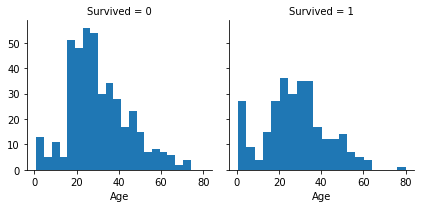

In [15]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Check age distribution for the processed data, where we've substituted missing values

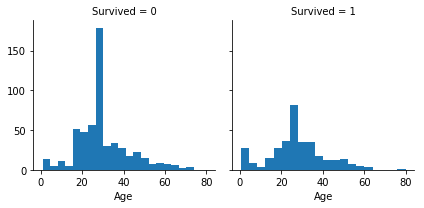

In [16]:
g = sns.FacetGrid(pd.concat([df, pd.DataFrame(y, columns=['Survived'])], axis=1), col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [17]:
kmeans = KMeans(n_clusters=2)

In [18]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
def predictScore(df, y):
    correct = 0
    for index, row in df.iterrows():
        predict_me = np.array(row.astype(float))
        predict_me = predict_me.reshape(-1, len(predict_me))
        prediction = kmeans.predict(predict_me)
        if prediction[0] == y[index]:
            correct += 1

    print(correct/len(df))

In a real clustering problem, of course, we don't have the labels. This example is just for illustration.

Your score may fluctuate between 2 percentages, depending on how the clusters were chosen.
I.e. cluster0 == 'Survived' & cluster1=='Dead' vs. cluster1 == 'Survived' & cluster0=='Dead'
This means a low or high score is good. Around 50% is not a good separation.

In [20]:
predictScore(df, y)

0.5230078563411896


Our score is not that good. Which is probably because we did not scale our data yet.

In [21]:
scaler = MinMaxScaler()

In [22]:
X_scaled = scaler.fit_transform(df)
X_scaled = pd.DataFrame(X_scaled, columns=[df.columns])

/home/sam/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype bool, int8, int16, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [23]:
display_all(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
Name,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Sex,891,NaN,NaN,NaN,1.64759,0.47799,1,1,2,2,2
Age,891,NaN,NaN,NaN,29.3616,13.0197,0.42,22,28,35,80
SibSp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
Parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
Ticket,891,NaN,NaN,NaN,339.529,200.851,1,159.5,338,520.5,681
Fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329
Cabin,891,NaN,NaN,NaN,17.6296,38.1403,0,0,0,0,147


In [24]:
display_all(X_scaled.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,0.500000,0.289162,0.0,0.250000,0.500000,0.750000,1.0
Pclass,891.0,0.654321,0.418036,0.0,0.500000,1.000000,1.000000,1.0
Name,891.0,0.500000,0.289162,0.0,0.250000,0.500000,0.750000,1.0
Sex,891.0,0.647587,0.477990,0.0,0.000000,1.000000,1.000000,1.0
Age,891.0,0.363679,0.163605,0.0,0.271174,0.346569,0.434531,1.0
SibSp,891.0,0.065376,0.137843,0.0,0.000000,0.000000,0.125000,1.0
Parch,891.0,0.063599,0.134343,0.0,0.000000,0.000000,0.000000,1.0
Ticket,891.0,0.497836,0.295369,0.0,0.233088,0.495588,0.763971,1.0
Fare,891.0,0.062858,0.096995,0.0,0.015440,0.028213,0.060508,1.0
Cabin,891.0,0.119929,0.259458,0.0,0.000000,0.000000,0.000000,1.0


In [25]:
y_means = kmeans.fit(X_scaled)

Your score may fluctuate between 2 percentages, depending on how the clusters were chosen.
I.e. cluster0 == 'Survived' & cluster1=='Dead' vs. cluster1 == 'Survived' & cluster0=='Dead'

This means a low or high score is good. Around 50% is not a good separation.

In [26]:
predictScore(X_scaled, y)

0.2132435465768799


Much better. 

In [33]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_fit = tsne.fit_transform(X_scaled)

In [34]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [35]:
group_pred = kmeans.fit_predict(X_scaled)

In [36]:
tsne_fit

array([[ 20.04702,  23.08263],
       [ -1.63226, -27.26405],
       [ 22.43911, -35.93979],
       ...,
       [-20.76056, -40.44162],
       [-26.74577,  11.7701 ],
       [ 18.23762,  31.88144]], dtype=float32)

In [37]:
name = df.pop('Name')

In [38]:
init_notebook_mode(connected=True)
trace = go.Scatter(
    x=tsne_fit.T[0], 
    y=tsne_fit.T[1],
    mode='markers',
    name='Lines, Markers and Text',
    text=name,
    textposition='top left',
    marker=dict(
        color = group_pred, #set color equal to a variable
        colorscale='Portland',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(
    showlegend=False
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=12)

In [41]:
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [42]:
X_pca = pca.transform(X_scaled)

([<matplotlib.axis.XTick at 0x7f68f27915c0>,
 <a list of 12 Text xticklabel objects>)

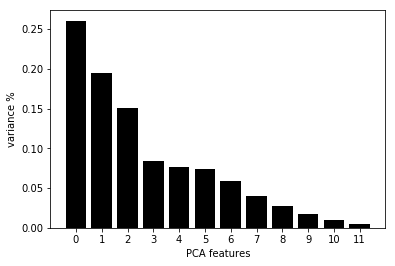

In [43]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [44]:
init_notebook_mode(connected=True)
trace = go.Scatter(
    x=X_pca.T[0], 
    y=X_pca.T[1],
    mode='markers',
    name='Lines, Markers and Text',
    text=name,
    textposition='top left',
    marker=dict(
        color = group_pred, #set color equal to a variable
        colorscale='Portland',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(
    showlegend=False
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

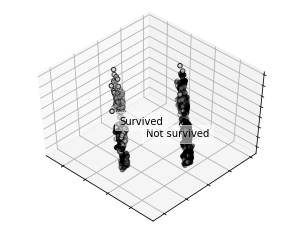

In [69]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Not survived', 0), ('Survived', 1)]:
    ax.text3D(X_pca[y == label, 0].mean(),
              X_pca[y == label, 1].mean(),
              0, name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
cy = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=cy, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()